In [311]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from  av.io import read
import pandas as pd
import datetime

In [312]:
def read_and_plot(filename, msg="", cuts=None, label=None, plot=False):
    data = read(" ".join(["a:" + str(i) for i in range(4)]), filename, 50)
    datapairs = list(zip(data[0], data[1]))
    
    df = pd.DataFrame()
    names = []
    col_name_tpls = []
    for sensor_data, stream_object in datapairs:
        meta_dict = stream_object.metadata
        print(meta_dict)
        name = meta_dict["NAME"]
        names.append(name)
        n_cols = len(sensor_data)
        col_names = []
        for i in range(n_cols):
            col_name = name + "_" + str(i)
            col_names.append(col_name)
            df[col_name] = pd.Series(sensor_data.T[:,i])
        col_name_tpls.append(col_names)
    df.index = pd.TimedeltaIndex(freq="20ms", start=0.0, periods=len(df))
    df_out_list = []
    if cuts: 
        for cut in cuts:
            df_i = df[pd.Timedelta(10**9 * cut[0]):pd.Timedelta(10**9 * cut[1])]
            df_out_list.append(df_i)
            df_i["Cywee Accelerometer Sensor_2"].plot()
            plt.show()
            
    # 3d plots
    for col_name_list in col_name_tpls:
        if not plot:
            break
        if len(col_name_list) == 3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.plot3D(*[df[col_name_list].iloc[:,i] for i in range(3)])
            ax.set_title(col_name_list[0][:-2])
            plt.show()
            print("("+ msg + ")")
            

    #2d plots
    for col_name_tpl in col_name_tpls:
        if not plot:
            break
        for col_name in col_name_tpl:
            if "acc" in col_name.lower():
                fig = df[col_name].plot()
                fig.set_title(col_name)
                plt.show()
                print("("+ msg + ")")
    df.to_csv("out.csv", header=False)
    print(len(df))
    
    return df, df_out_list, col_name_tpls

In [313]:
def find_peaks(df, start=0.0, end=None, sel_method="right"):
    peaks = []
    if end:
        df = df[pd.Timedelta(10**9 * start):pd.Timedelta(10**9 * end)]
    else:
        df = df[pd.Timedelta(10**9 * start):]

    for i in df.index:
        value = df["Cywee Accelerometer Sensor_2"][i]
        if sel_method == "right":
            cond = value > 7
        elif sel_method == "left":
            cond = value < -1
        if cond:
            new = True
            for peak in peaks:
                if i - pd.Timedelta(10**9) < peak + pd.Timedelta(10**9):
                    new = False
                    break
            if new:
                peaks.append(i)
    cuts = []
    for peak in peaks:
        t = peak.value / 10 ** 9
        cuts.append((t-1, t+1))
    return cuts 

In [318]:
def plot_selection_helper(filename, time=(0.0, None),method="right"):
    gesture_df, df_list, _ = read_and_plot(filename, msg="Swipe RIGHT", plot=False)
    cuts = find_peaks(gesture_df,time[0], time[1], sel_method=method)
    print(len(cuts))
    _, df_list, _ = read_and_plot(filename, msg="Swipe RIGHT", cuts=cuts)
    return gesture_df, df_list

{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


5309
10
{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.180000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.080000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:46.120000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


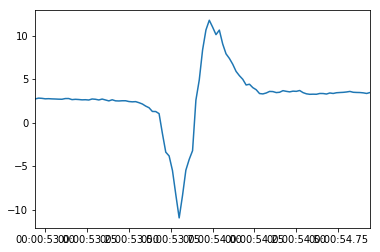

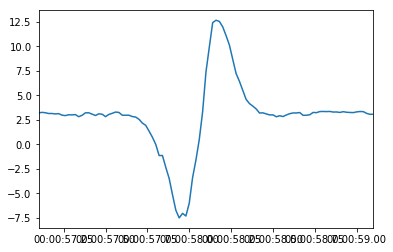

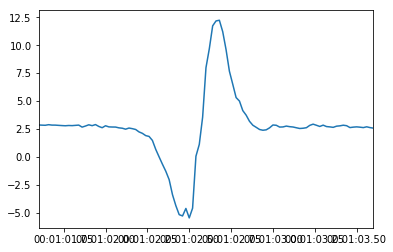

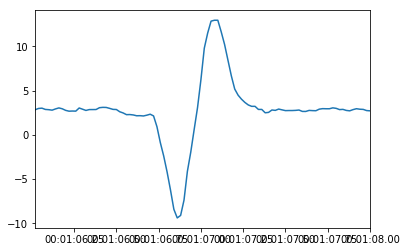

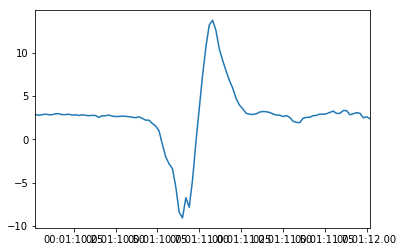

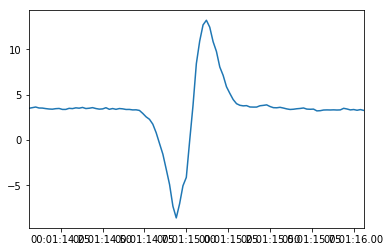

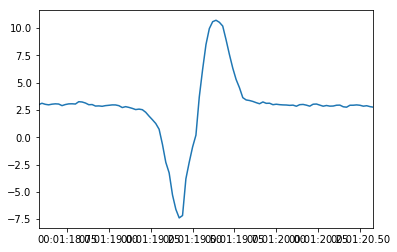

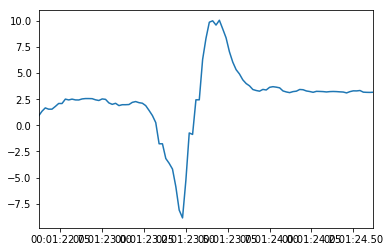

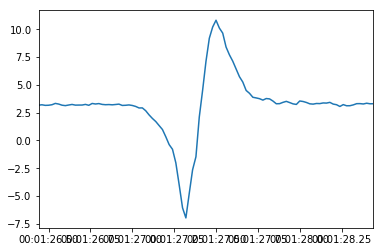

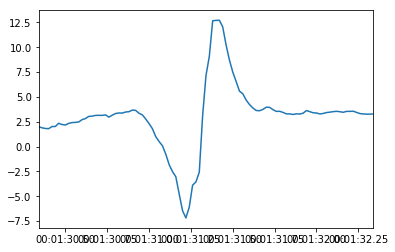

5309


In [319]:
gesture_df, df_list = plot_selection_helper("swipe_right_10_new.mkv", time=(53,94.6))

{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.100000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:06.940000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


3350
10
{'NAME': 'Rotation Vector (WAKE_UP)', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.100000000'}
{'NAME': 'Cywee Accelerometer Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:06.940000000'}
{'NAME': 'Cywee Gyroscope Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}
{'NAME': 'Cywee Magnetic field Sensor', 'ENCODER': 'Lavc57.46.100 wavpack', 'DURATION': '00:01:07.000000000'}


/home/gende/repos/PyAV/venvs/Linux.4.4.0-17134-Microsoft.cpython3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Creating a TimedeltaIndex by passing range endpoints is deprecated.  Use `pandas.timedelta_range` instead.


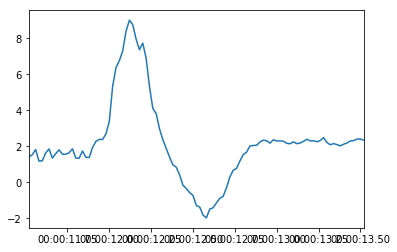

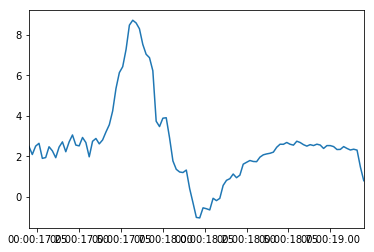

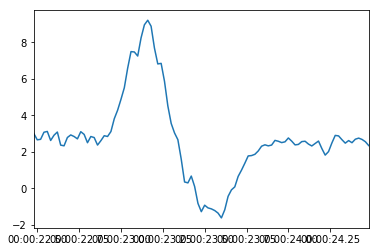

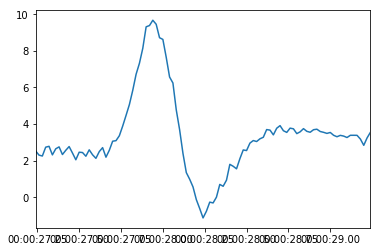

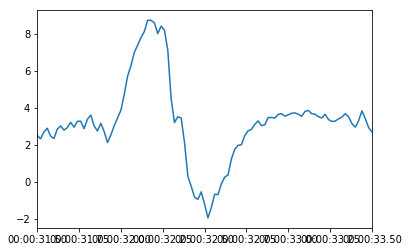

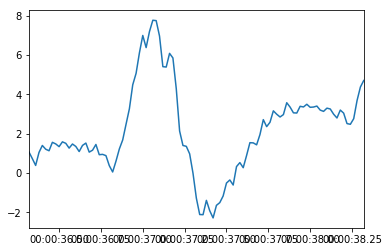

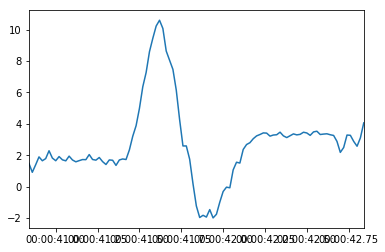

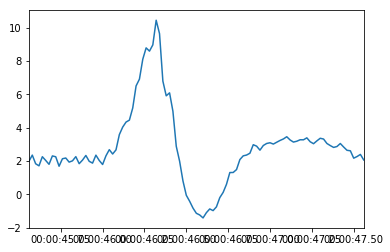

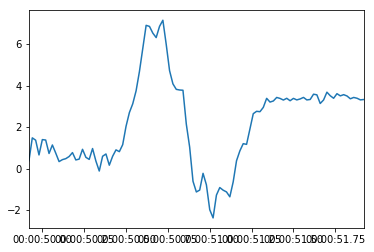

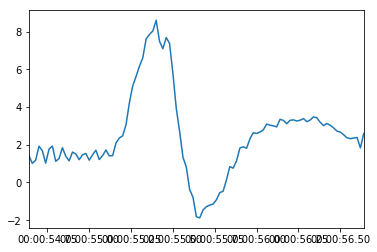

3350


In [336]:
left_gesture_df, df_list_left = plot_selection_helper("swipe_left_10.mkv", method="left", time=(10,58))

In [246]:
out_df = df.iloc[:,5:11].copy()
out_df["label"] = 0
out_df

,Cywee Accelerometer Sensor_0,Cywee Accelerometer Sensor_1,Cywee Accelerometer Sensor_2,Cywee Gyroscope Sensor_0,Cywee Gyroscope Sensor_1,Cywee Gyroscope Sensor_2,label
00:00:00,-1.986328,-3.728516,8.843750,-3.214844,-0.231934,0.259521,0
00:00:00.020000,-3.175781,-4.226562,5.773438,-2.632812,-0.383057,-0.134033,0
00:00:00.040000,-3.447266,-5.609375,9.070312,-1.168945,0.134033,-0.520020,0
00:00:00.060000,-1.567383,-2.750000,7.554688,-1.449219,0.258545,-0.587402,0
00:00:00.080000,-2.687500,-4.339844,7.539062,-0.003191,0.001063,-1.027344,0
00:00:00.100000,-3.691406,-6.683594,8.093750,-0.560547,-0.358643,-0.854492,0
00:00:00.120000,-1.855469,-4.503906,7.152344,-1.288086,0.648926,-0.292480,0
00:00:00.140000,-3.236328,-3.863281,6.722656,-1.565430,1.063477,-0.259521,0
00:00:00.160000,-2.982422,-5.566406,5.457031,-1.970703,0.758789,-0.234009,0
00:00:00.180000,-2.748047,-5.468750,4.757812,-2.898438,1.452148,-0.850098,0


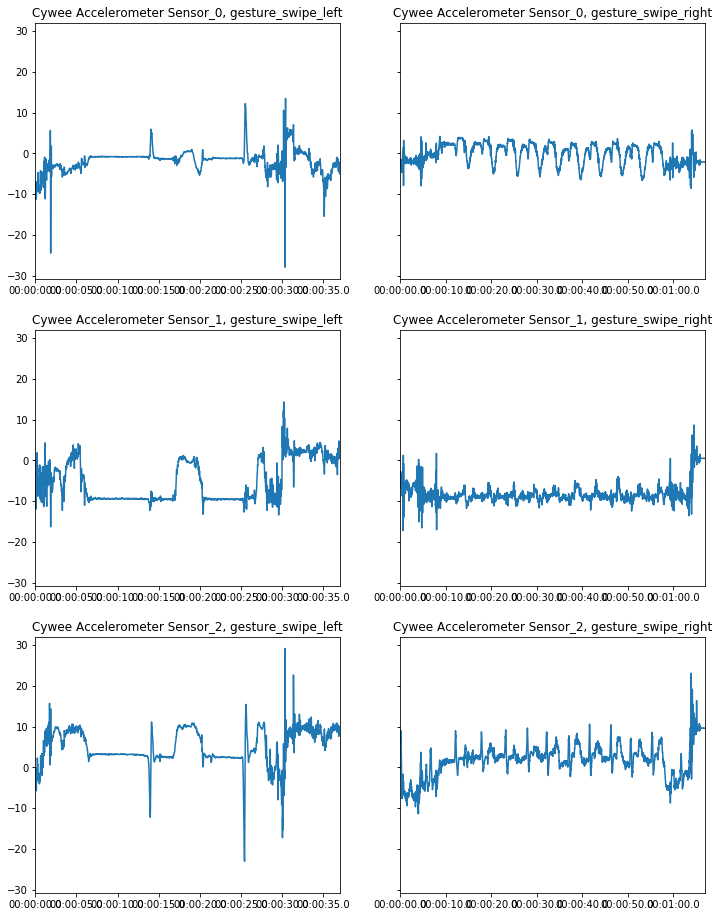

In [219]:
gestures = ["swipe_left", "swipe_right"]

fig, axes = plt.subplots(3,2, sharey=True, figsize=(12, 16))
for col_name_tpl in col_name_tpls:
    for i, col_name in enumerate(col_name_tpl):
        if "acc" in col_name.lower():
            for j,df in enumerate([df_swipe_left, df_swipe_right]):
                df[col_name].plot(ax=axes[i,j])
                axes[i,j].set_title(col_name+ ", gesture_" + gestures[j])

plt.savefig("gesture_acc.pdf")
plt.show()

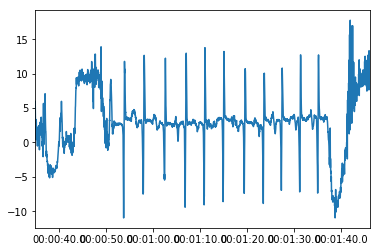

In [335]:
gesture_df["Cywee Accelerometer Sensor_2"][pd.Timedelta(10**9*35):pd.Timedelta(10**9*120)].plot()
plt.savefig("all_trials.pdf")

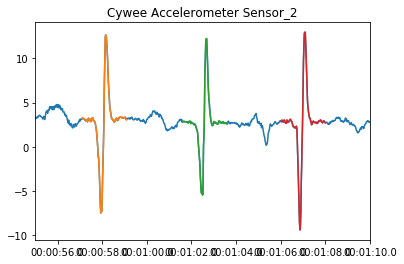

In [334]:
ax = gesture_df["Cywee Accelerometer Sensor_2"][pd.Timedelta(10**9*55):pd.Timedelta(10**9*70)].plot()
plt.title("Cywee Accelerometer Sensor_2")
plt.xticks(rotation=90)
plt.savefig("three_trials.pdf")
for df in df_list:
    sub_df = df["Cywee Accelerometer Sensor_2"][pd.Timedelta(10**9*55):pd.Timedelta(10**9*70)]
    if len(sub_df) > 0:
        sub_df.plot()
plt.savefig("three_trials_marked.pdf")

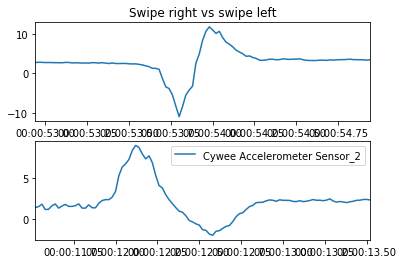

In [349]:
fig, axes = plt.subplots(2,1)
df_list[0]["Cywee Accelerometer Sensor_2"].plot(ax=axes[0])
df_list_left[0]["Cywee Accelerometer Sensor_2"].plot(ax=axes[1])
axes[0].set_title("Swipe right vs swipe left")
plt.legend()
plt.savefig("leftvsright.pdf")
plt.show()


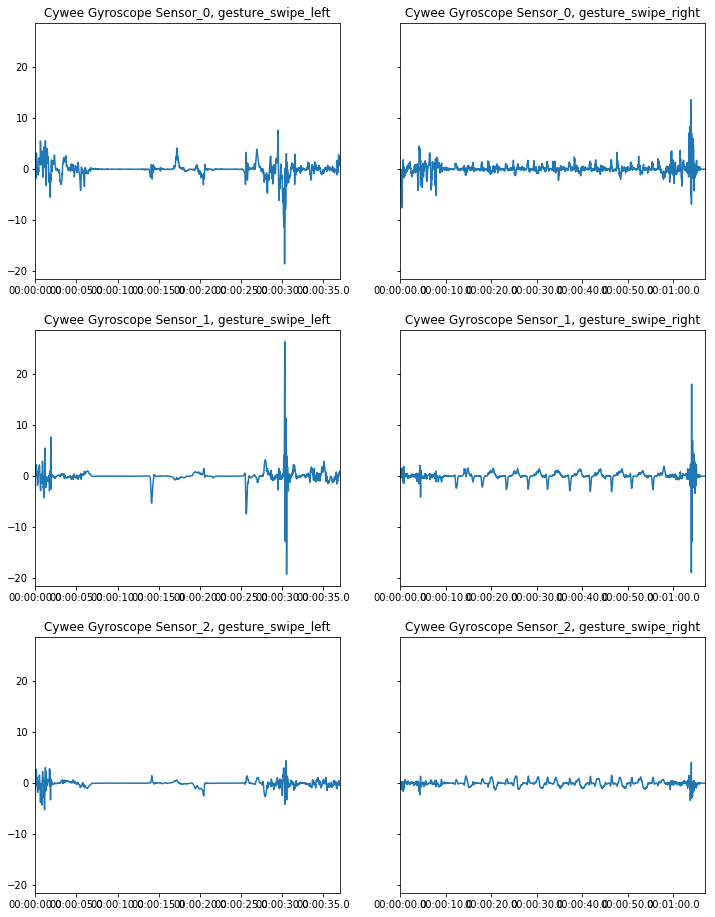

In [220]:
gestures = ["swipe_left", "swipe_right"]

fig, axes = plt.subplots(3,2, sharey=True, figsize=(12, 16))
for col_name_tpl in col_name_tpls:
    for i, col_name in enumerate(col_name_tpl):
        if "gyro" in col_name.lower():
            for j,df in enumerate([df_swipe_left, df_swipe_right]):
                df[col_name].plot(ax=axes[i,j])
                axes[i,j].set_title(col_name+ ", gesture_" + gestures[j])

plt.savefig("gesture_gyro.pdf")
plt.show()


In [221]:
df.shape

(3350, 14)

In [222]:
##col_name_tpls

In [223]:
# plot all in 2D:


In [224]:
df.shape

(3350, 14)

In [225]:
df.index[0]

Timedelta('0 days 00:00:00')

In [226]:
from  seqlearn.hmm import MultinomialHMM as HMM

In [227]:
pd.Timedelta(10**9) # 10 ** 9 is 1 s

# -> ns

Timedelta('0 days 00:00:01')

In [229]:
a = HMM()